<a href="https://colab.research.google.com/github/Yewon9/STT_JEJU/blob/main/EDA_and_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!pip install pydub

In [9]:
import pandas as pd
from pydub import AudioSegment
from tqdm import tqdm
import matplotlib.pyplot as plt
import librosa
import numpy as np
import seaborn as sns
import re

# DATA

In [18]:
df = pd.read_csv('df.csv')

In [19]:
df

,Path,Text,Standard Text
0,/content/drive/MyDrive/JEJU/data/wav/TL_02/say...,여름에 보양식은 그 동네에서 보면 그 자리들 잡아가지고 된장에 풀어가지고 생된장에 ...,여름에 보양식은 그 동네에서 보면 그 자리돔들 잡아서 된장에 풀어서 생된장에 풀어서...
1,/content/drive/MyDrive/JEJU/data/wav/TL_02/say...,태풍은 나 중학교 땐가 정확하게 기억은 잘 안 나는디 옛날에 해가지고는 엄청나게 사...,태풍은 나 중학교 때인가 정확하게 기억은 잘 안 나는데 옛날에 해가지고는 엄청나게 ...
2,/content/drive/MyDrive/JEJU/data/wav/TL_02/say...,그추룩헹은에 이제 제사 지낸 지가 한 이제 오 년 정도 됐신디예 어떵 하다 보니까 ...,그렇게 해서 이제 제사 지낸 지가 한 이제 오 년 정도 됐는데요 어떻게 하다 보니까...
3,/content/drive/MyDrive/JEJU/data/wav/TL_02/say...,어 여기는 지금 농작물은 농사를 뭐 밭농사랑 뭐 과수원 같은 거 많이 하니까 뭐 이...,어 여기는 지금 농작물은 농사를 뭐 밭농사랑 뭐 과수원 같은 거 많이 하니까 뭐 이...
4,/content/drive/MyDrive/JEJU/data/wav/TL_02/say...,우리는 형제 자매가 많아 가지고 옛날이라부난 옛날에 어른들은 게 아이들 형제들 네 ...,우리는 형제 자매가 많아 가지고 옛날이다보니까 옛날에 어른들은 게 아이들 형제들 네...
...,...,...,...
12337,/content/drive/MyDrive/JEJU/data/wav/VL_01/st_...,이제 눈 어두웡 바농귀 끼지 못행 바농질 못 하켜,이제 눈 어두워서 바늘귀 꿰지 못해서 바느질 못 하겠어
12338,/content/drive/MyDrive/JEJU/data/wav/VL_01/st_...,밧디서 나록을 비민 무껑 그 나록뭇을 쉐에 시껑 집이 왓저,밭에서 벼를 베면 묶어서 그 볏단을 소에 싣고 집에 왔지
12339,/content/drive/MyDrive/JEJU/data/wav/VL_01/st_...,일 끗나거덜랑 어드레 가지 말앙 고짝 집더레 옵서예,일 끝나거든 어디 가지 말고 곧장 집으로 오세요
12340,/content/drive/MyDrive/JEJU/data/wav/VL_01/st_...,나가 그자 온 것이 아니고 이 집이 큰똘을 중진허젠 허로 왓수다,내가 그냥 온 것이 아니고 이 집이 큰딸을 중신하려고 하러 왔습니다


## 데이터 개수 확인

In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12342 entries, 0 to 12341
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Path           12342 non-null  object
 1   Text           12342 non-null  object
 2   Standard Text  12342 non-null  object
dtypes: object(3)
memory usage: 289.4+ KB
None


In [21]:
print(df.describe())

                                                     Path  \
count                                               12342   
unique                                              12342   
top     /content/drive/MyDrive/JEJU/data/wav/TL_02/say...   
freq                                                    1   

                           Text        Standard Text  
count                     12342                12342  
unique                     8771                 8413  
top     느네 아방이영 어멍이영 혼디 어디 감신고이  우리 아들은 거짓말을 모르는 아이야  
freq                         36                   37  


In [22]:
missing_text = df[df['Text'] == '']
print(f"빈 텍스트 개수: {len(missing_text)}")

빈 텍스트 개수: 0


## 음성 파일 길이 분석

In [23]:
def get_audio_length(path):
  audio = AudioSegment.from_wav(path)
  return len(audio) / 1000

In [24]:
df['Audio_Length'] = [get_audio_length(path) for path in tqdm(df['Path'])]

100%|██████████| 12342/12342 [02:00<00:00, 102.14it/s]


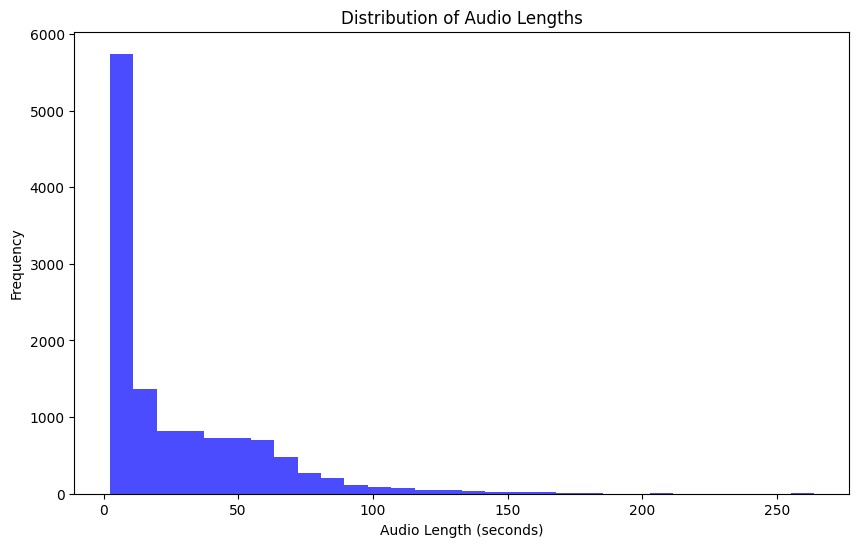

In [25]:
plt.figure(figsize = (10, 6))
plt.hist(df['Audio_Length'], bins = 30, color = 'blue', alpha = 0.7)
plt.title('Distribution of Audio Lengths')
plt.xlabel('Audio Length (seconds)')
plt.ylabel('Frequency')
plt.show()

In [26]:
over_100_seconds = df[df['Audio_Length'] > 100]
print(f"100초 이상인 데이터 개수: {len(over_100_seconds)}")

100초 이상인 데이터 개수: 348


In [27]:
df_filtered = df[df['Audio_Length'] <= 100]
df_filtered

,Path,Text,Standard Text,Audio_Length
0,/content/drive/MyDrive/JEJU/data/wav/TL_02/say...,여름에 보양식은 그 동네에서 보면 그 자리들 잡아가지고 된장에 풀어가지고 생된장에 ...,여름에 보양식은 그 동네에서 보면 그 자리돔들 잡아서 된장에 풀어서 생된장에 풀어서...,37.309
1,/content/drive/MyDrive/JEJU/data/wav/TL_02/say...,태풍은 나 중학교 땐가 정확하게 기억은 잘 안 나는디 옛날에 해가지고는 엄청나게 사...,태풍은 나 중학교 때인가 정확하게 기억은 잘 안 나는데 옛날에 해가지고는 엄청나게 ...,36.210
2,/content/drive/MyDrive/JEJU/data/wav/TL_02/say...,그추룩헹은에 이제 제사 지낸 지가 한 이제 오 년 정도 됐신디예 어떵 하다 보니까 ...,그렇게 해서 이제 제사 지낸 지가 한 이제 오 년 정도 됐는데요 어떻게 하다 보니까...,55.159
3,/content/drive/MyDrive/JEJU/data/wav/TL_02/say...,어 여기는 지금 농작물은 농사를 뭐 밭농사랑 뭐 과수원 같은 거 많이 하니까 뭐 이...,어 여기는 지금 농작물은 농사를 뭐 밭농사랑 뭐 과수원 같은 거 많이 하니까 뭐 이...,40.959
4,/content/drive/MyDrive/JEJU/data/wav/TL_02/say...,우리는 형제 자매가 많아 가지고 옛날이라부난 옛날에 어른들은 게 아이들 형제들 네 ...,우리는 형제 자매가 많아 가지고 옛날이다보니까 옛날에 어른들은 게 아이들 형제들 네...,37.250
...,...,...,...,...
12337,/content/drive/MyDrive/JEJU/data/wav/VL_01/st_...,이제 눈 어두웡 바농귀 끼지 못행 바농질 못 하켜,이제 눈 어두워서 바늘귀 꿰지 못해서 바느질 못 하겠어,5.040
12338,/content/drive/MyDrive/JEJU/data/wav/VL_01/st_...,밧디서 나록을 비민 무껑 그 나록뭇을 쉐에 시껑 집이 왓저,밭에서 벼를 베면 묶어서 그 볏단을 소에 싣고 집에 왔지,7.680
12339,/content/drive/MyDrive/JEJU/data/wav/VL_01/st_...,일 끗나거덜랑 어드레 가지 말앙 고짝 집더레 옵서예,일 끝나거든 어디 가지 말고 곧장 집으로 오세요,5.700
12340,/content/drive/MyDrive/JEJU/data/wav/VL_01/st_...,나가 그자 온 것이 아니고 이 집이 큰똘을 중진허젠 허로 왓수다,내가 그냥 온 것이 아니고 이 집이 큰딸을 중신하려고 하러 왔습니다,4.940


## 텍스트 길이 분석

In [28]:
df_filtered['Text_Length'] = df_filtered['Text'].apply(len)

<ipython-input-28-a5e7b1db179e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Text_Length'] = df_filtered['Text'].apply(len)


In [29]:
print(df_filtered[['Text', 'Text_Length']].head())

                                                Text  Text_Length
0  여름에 보양식은 그 동네에서 보면 그 자리들 잡아가지고 된장에 풀어가지고 생된장에 ...          219
1  태풍은 나 중학교 땐가 정확하게 기억은 잘 안 나는디 옛날에 해가지고는 엄청나게 사...          211
2  그추룩헹은에 이제 제사 지낸 지가 한 이제 오 년 정도 됐신디예 어떵 하다 보니까 ...          417
3  어 여기는 지금 농작물은 농사를 뭐 밭농사랑 뭐 과수원 같은 거 많이 하니까 뭐 이...          242
4  우리는 형제 자매가 많아 가지고 옛날이라부난 옛날에 어른들은 게 아이들 형제들 네 ...          224


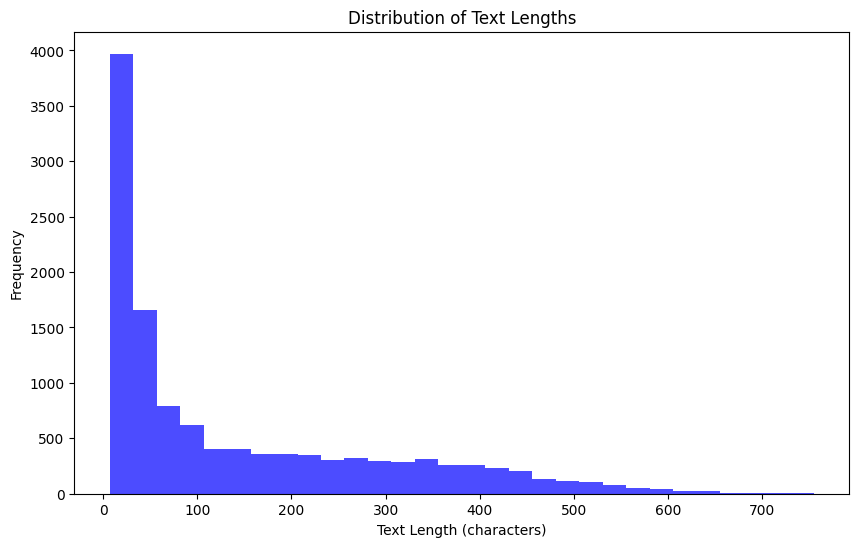

In [30]:
plt.figure(figsize = (10, 6))
plt.hist(df_filtered['Text_Length'], bins = 30, color = 'blue', alpha = 0.7)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')
plt.show()

## 빈 텍스트 확인

In [31]:
empty_texts = df_filtered[df_filtered['Text_Length'] == 0]
print(f"빈 텍스트 개수: {len(empty_texts)}")

빈 텍스트 개수: 0


In [32]:
df_filtered.to_csv('df_eda.csv', index = False, encoding = 'utf-8-sig')

## 랜덤샘플링

In [33]:
df_sampled = df.sample(n = 6000, random_state = 42)
df_sampled

,Path,Text,Standard Text,Audio_Length
6345,/content/drive/MyDrive/JEJU/data/wav/TL_02/say...,아 난 다른 운동은 안 허고 그냥 걷는 것이 다리 아직은 안 아프난 기냥 걸어그네 ...,아 난 다른 운동은 안 하고 그냥 걷는 것이 다리 아직은 안 아프니까 그냥 걸어서 ...,10.000
2236,/content/drive/MyDrive/JEJU/data/wav/TL_02/say...,큰아이도 이제 공기업에 있고 우리 작은애는 이제 공무원 되고 하나 결혼해서 이제 애...,큰아이도 이제 공기업에 있고 우리 작은애는 이제 공무원 되고 하나 결혼해서 이제 아...,24.000
4132,/content/drive/MyDrive/JEJU/data/wav/TL_02/say...,아침에 일어나면 딱 눈 뜨면 커피 먹고 커피 먹고 난 다음에 유튜브 유튜브에서 이것...,아침에 일어나면 딱 눈 뜨면 커피 먹고 커피 먹고 난 다음에 유튜브 유튜브에서 이것...,13.930
5778,/content/drive/MyDrive/JEJU/data/wav/TL_02/say...,젊을 때는 길에서 넘어지면 그냥 거기서 약 바르면 되지 뭐 할 수 있어요 그래도 되...,젊을 때는 길에서 넘어지면 그냥 거기서 약 바르면 되지 뭐 할 수 있어요 그래도 되...,26.690
10754,/content/drive/MyDrive/JEJU/data/wav/VL_01/st_...,나가 그자 온 것이 아니고 이 집이 큰 똘을 중신허젠 왔수다,내가 그냥 온 것이 아니고 이 집이 큰 딸을 중신하려고 왔습니다,6.299
...,...,...,...,...
1515,/content/drive/MyDrive/JEJU/data/wav/TL_02/say...,재작년에 성안에 이신 한국병원이라는 건디가 받았신디 건강검진센터에 강인해 이 검사를...,재작년에 성안에 있는 한국병원이라는 건디가 받았는데 건강검진센터에 강인해 이 검사를...,18.959
11654,/content/drive/MyDrive/JEJU/data/wav/VL_01/st_...,느네 아바이영 어멍이영 혼디 어디 감신고이,너희 아버지하고 어머니하고 함께 어디 가시고 있지,4.699
11931,/content/drive/MyDrive/JEJU/data/wav/VL_01/st_...,똠떼기사 시원허민 나스난 거씬 모욕헤 불라,땀띠는 시원하면 나으니 얼른 목욕해 버려라,7.280
11168,/content/drive/MyDrive/JEJU/data/wav/VL_01/st_...,곹이 음식을 먹어신디 누긴 두드러기가 막 나고 누긴 펜지롱헷저이,같이 음식을 먹었는데 누구는 두드러기가 막 나고 누구는 말짱했죠,6.260


In [34]:
df_remaining = df.drop(df_sampled.index)

In [35]:
df_sampled.to_csv('sampled_data.csv', index = False, encoding = "utf-8-sig")

In [36]:
df_remaining.to_csv('remaining_data.csv', index = False, encoding = "utf-8-sig")